<a href="https://colab.research.google.com/github/emiliabullano/emiliabullano.github.io/blob/master/Tarea_27_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarea Python. 
Bullano Maria Emilia y Gastón García Zavaleta


1. Abrir base de datos

In [1]:
from google.colab import files
uploaded = files.upload()

Saving base_tarea.xls to base_tarea.xls


In [31]:
import pandas as pd
import numpy as np
import io


In [59]:
df = pd.read_excel('base_tarea.xls')

1.	Mostrar las primeras y últimas filas de la base 

In [48]:
print(df.head(n=5))

   Year      ID  ... Labor_Hours       date
0  2013  103381  ...       22392 2003-06-17
1  2013  103404  ...       28447 2005-09-21
2  2013  100759  ...      474784 2001-01-13
3  2013  103246  ...       29193 2006-01-03
4  2013  103451  ...       46393 2007-05-21

[5 rows x 13 columns]


In [ ]:
print(df.tail(n=5))

2. Obtener los tipos de datos de las variables. 

In [39]:
print(df.dtypes)

Year                          int64
ID                            int64
Name                         object
State                        object
County                       object
columna_nueva               float64
Status                       object
Type                         object
Company Type                 object
Production                    int64
Average Employees             int64
Labor_Hours                   int64
date                 datetime64[ns]
dtype: object


3.	Mostrar las primeras y últimas filas de la base de 3 columnas que elijamos (Year, State y Production) 

In [23]:
df2 = df[["Year", "State", "Production"]]
print(df2.head(n=5))
print(df2.tail(n=5))

   Year    State  Production
0  2013  Alabama       56004
1  2013  Alabama       28807
2  2013  Alabama     1440115
3  2013  Alabama       87587
4  2013  Alabama      147499
      Year            State  Production
1445  2013  Refuse Recovery       18532
1446  2013  Refuse Recovery        5070
1447  2013  Refuse Recovery      377607
1448  2013  Refuse Recovery        7744
1449  2013  Refuse Recovery       17357


4.	Mostrar las estadísticas básicas (media, sd, min, max) de "Production".

In [30]:
print((df["Production"].describe()))

count    1.450000e+03
mean     6.792012e+05
std      4.414922e+06
min      0.000000e+00
25%      0.000000e+00
50%      3.060650e+04
75%      2.514752e+05
max      1.110055e+08
Name: Production, dtype: float64


In [ ]:
5.	Insertar una columna en la quinta posición y llenarla de valores NaN 

In [60]:
df.insert(4, "columna_nueva", np.nan, allow_duplicates=False)

Corroboramos que efectivamente se crea la variable en la quinta posición

In [61]:
print(df.dtypes)

Year                          int64
ID                            int64
Name                         object
State                        object
columna_nueva               float64
County                       object
Status                       object
Type                         object
Company Type                 object
Production                    int64
Average Employees             int64
Labor_Hours                   int64
date                 datetime64[ns]
dtype: object


6.	Importar a un dataframe los datos saltando las primeras 10 filas

In [50]:
df3 = pd.read_excel('base_tarea.xls', skiprows=[i for i in range(1,11)])

In [ ]:
print(df3.head(10))

In [ ]:
7.	Añadir una fila con la producción total y las horas de trabajo totales.

In [62]:
lista_total = [np.nan, np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,df["Production"].sum(), np.nan,df["Labor_Hours"].sum(), np.nan]
print(lista_total)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, 984841779, nan, 177910757, nan]


Anexamos al final de la base el vector creado anteriormente

In [64]:
df_length = len(df)
df.loc[df_length] = lista_total
print(df)

        Year         ID  ...  Labor_Hours       date
0     2013.0   103381.0  ...      22392.0 2003-06-17
1     2013.0   103404.0  ...      28447.0 2005-09-21
2     2013.0   100759.0  ...     474784.0 2001-01-13
3     2013.0   103246.0  ...      29193.0 2006-01-03
4     2013.0   103451.0  ...      46393.0 2007-05-21
...      ...        ...  ...          ...        ...
1447  2013.0  4407233.0  ...      43684.0 2002-08-17
1448  2013.0  1518524.0  ...        622.0 2002-08-16
1449  2013.0  1519685.0  ...       1020.0 2005-09-28
1450     NaN        NaN  ...  177910757.0        NaT
1451     NaN        NaN  ...  177910757.0        NaT

[1452 rows x 13 columns]


8.	Importar a un data frame las primeras 10 filas

In [ ]:
df_10 = pd.read_excel('base_tarea.xls', nrows=10)
print(df_10)

9.	Crear un subtotal de "Horas de trabajo" por ID (lo hacemos sobre la base general)

In [76]:
subtotal_H = df[["ID",'Labor_Hours']].groupby(by="ID").sum()

In [ ]:
print(subtotal_H)

10.	Mostrar los valores para un ID de MSHA específico (ej. 102976) - Lo hacemos para el acumulado -

In [101]:
print(subtotal_H.loc[[1519402]])


         Labor_Hours
ID                  
1519402       5397.0


11.	Mostrar aquellas observaciones en las que "Horas de trabajo" > 25000

In [105]:
mayor_2500 = subtotal_H[subtotal_H["Labor_Hours"] > 25000]
mayor_2500.min()

Labor_Hours    25164.0
dtype: float64

12.	Encuentre todos los registros que incluyan dos identificaciones específicas de MSHA. (lo hacemos sobre la base original)

In [ ]:
df.loc[(df["ID"] == 102901) | (df["ID"] == 102976)]

13.	Ordenar los registros por la columna “Horas de trabajo” (lo hacemos sobre la base original, de menor a mayor)

In [ ]:
df.sort_values(by="Labor_Hours")

14.	Haga una lista en donde date esté entre febrero 2005 y noviembre 2006 (lo hacemos sobre la base original)

In [ ]:
df_fechas = df[(df['date'] >= '2005-02-01') & (df['date'] < '2006-11-01')]
df_fechas.sort_values(by="date")

15.	Mostrar la lista de aquellos cuyos date sea 2005 

In [ ]:
df_2005 = df[df['date'].dt.year == 2005]
df_2005

16.	Ordenar en base a ID y date columnas dadas 

In [ ]:
df.sort_values(by=['ID','date'], ascending=[False,True])

17.	Crear tres hojas de datos (sheet) desde el archivo de Excel y combinarlas en un único Excel. Las tres hojas de datos son las mismas, sería triplicar el Excel

In [133]:
from google.colab import files
uploaded = files.upload()

Saving base_tarea_triplicada.xls to base_tarea_triplicada.xls


In [134]:
triple_1 = pd.read_excel('base_tarea_triplicada.xls', sheet_name="Hist_Coal_Prod")
triple_2 = pd.read_excel('base_tarea_triplicada.xls', sheet_name="Hist_Coal_Prod (2)")
triple_3 = pd.read_excel('base_tarea_triplicada.xls', sheet_name="Hist_Coal_Prod (3)")


In [ ]:
df_triplicada = pd.concat([triple_1, triple_2, triple_3])
df_triplicada

18.	Dibujar un gráfico de barras comparando el año, el ID, la producción y las horas de trabajo de las primeras 10 observaciones.

In [137]:
import matplotlib.pyplot as plt
# Para que Matplotlib plots lo muestre en notebook.
%matplotlib inline

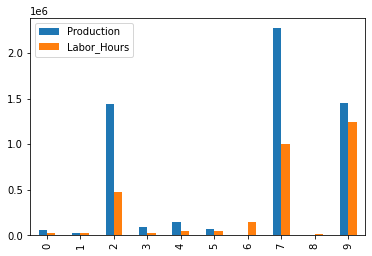

In [142]:
df_10[["Production", "Labor_Hours"]].plot(kind ="bar")

19.	Dibujar un gráfico de barras de las 10 empresas con mayor producción.  

In [143]:
empresas_prod = df[["Name",'Production']].groupby(by="Name").sum()

In [147]:
empresas_prod_sort = empresas_prod.sort_values(by="Production", ascending=False)

In [148]:
empresas_prod_10 = empresas_prod_sort.head(10)

In [ ]:
empresas_prod_10[["Production"]].plot(kind ="bar")